### Probability and Distributions

Self-study :)

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from scipy.stats import multivariate_normal

In [2]:
%%html
<style>
table {float:left}
</style>

#### Bivariate distribution - Discrete random variables X and Y

Considering the following bivariate distribution $p(x,y)$ of two discrete random variables $X$ and $Y$:


|       |$x_{1}$|$x_{2}$|$x_{3}$|$x_{4}$|$x_{5}$|
|-------|-------|-------|-------|-------|-------|
|$y_{1}$|0.05   |0.1    |0.05   |0.07   |0.2    |
|$y_{2}$|0.1    |0.05   |0.03   |0.05   |0.04   |
|$y_{3}$|0.01   |0.02   |0.03   |0.1    |0.1    |

Let's compute the marginal distributions $p(x)$ and $p(y)$ and the conditional distributions $p(x | Y = y_{1})$ and $p(y | X = x_{3})$

We denote by $n_{ij}$ the number of events with state $X = x_{i}$ and $Y = y_{j}$. The probability distribution of each random variable, the marginal probability, can be seen as the sum over a row or column:

>$P(X = x_{i}) = \frac{c_{i}}{N}$ 

or

>$P(Y = y_{j}) = \frac{r_{j}}{N}$

Where $c_{i}$ is the sum of the individual frequencies for the *i*th columns, that is $\sum_{j=0}^{3} n_{ij}$ and $r_{j}$ is the row sum, that is, $r_{j} = \sum_{i=0}^{5} n_{ij}$

In [3]:
bivariate_pmf = np.array([[0.05, 0.1, 0.05, 0.07, 0.2],
                          [0.1, 0.05, 0.03, 0.05, 0.05],
                          [0.01, 0.02, 0.03, 0.1, 0.1]])

N = np.multiply(*bivariate_pmf.shape)

c_i = np.sum(bivariate_pmf, axis=0)
r_j = np.sum(bivariate_pmf, axis=1)

P_X = c_i/N
P_Y = r_j/N

The marginal probability of each $X$ and $Y$ random variables are:

In [4]:
(c_i, r_j,
 P_X, P_Y)

(array([0.16, 0.17, 0.11, 0.22, 0.35]),
 array([0.47, 0.28, 0.26]),
 array([0.01066667, 0.01133333, 0.00733333, 0.01466667, 0.02333333]),
 array([0.03133333, 0.01866667, 0.01733333]))

The conditional probaility is the fraction of a row column in a particular cell. For example, the conditional probability of $Y$ given $X$ is:

>$P(Y = y_{j} | X = x_{i}) = \frac{n_{ij}}{c_{i}}$

and the conditional probability of $X$ given $Y$ is:

>$P(X = x_{i} | Y = y_{j}) = \frac{n_{ij}}{r_j}$

In [5]:
P_Y_X = []
P_X_Y = []

for i in range(3):
    for j in range(5):
        n_i_j = bivariate_pmf[i,j]
        p_y_x_tmp = n_i_j / c_i[j]
        p_x_y_tmp = n_i_j / r_j[i]
        
        P_Y_X = np.hstack([P_Y_X, p_y_x_tmp])
        P_X_Y = np.hstack([P_X_Y, p_x_y_tmp])

In [6]:
P_X_Y, P_Y_X

(array([0.10638298, 0.21276596, 0.10638298, 0.14893617, 0.42553191,
        0.35714286, 0.17857143, 0.10714286, 0.17857143, 0.17857143,
        0.03846154, 0.07692308, 0.11538462, 0.38461538, 0.38461538]),
 array([0.3125    , 0.58823529, 0.45454545, 0.31818182, 0.57142857,
        0.625     , 0.29411765, 0.27272727, 0.22727273, 0.14285714,
        0.0625    , 0.11764706, 0.27272727, 0.45454545, 0.28571429]))

#### Two Gaussian Distributions

Consider a mixture of two Gaussian distributions, in the form:

$$p(\boldsymbol x) = \sum_{k=1}^K \pi_k \mathcal{N}(\boldsymbol x|\boldsymbol \mu_k, \boldsymbol \Sigma_k)\,,\quad \pi_k \geq 0\,,\quad \sum_{k=1}^K\pi_k = 1$$

for 
$$\mu_{1} =
\begin{bmatrix}
10 \\
2 \\
\end{bmatrix},
\mu_{2} = 
\begin{bmatrix}
0 \\
0 \\
\end{bmatrix},
\Sigma_{1} = 
\begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix},
\Sigma_{2} =
\begin{bmatrix}
8.4 & 2.0 \\
2.0 & 1.7 \\
\end{bmatrix},
$$
and $\pi_{1} = 0.4$, $\pi_{2} = 0.6$


Let's compute:

(a) The marginal distributions for each dimension

The marginal distribution $p(\boldsymbol{x})$ of a joint Gaussian distribution $p(\boldsymbol{x}, \boldsymbol{y})$ is itself Gaussian and computed by applying the sum rule:

>$$
\begin{equation}
p(\boldsymbol{x}) = \begin{cases}
     \sum_{y\in\mathcal{Y}} p(\boldsymbol{x}, \boldsymbol{y}) & \text{ if } \boldsymbol{y} \text{ is discrete}\\
     \int_{\mathcal{Y}} p(\boldsymbol{x}, \boldsymbol{y})d\boldsymbol{y} & \text{ if } \boldsymbol{y} \text{ is continous}\\
  \end{cases}
 \end{equation}
$$

So, applying the sum rule to the Gaussian distribution, we can compute the marginal distribution for one dimesion:

>$p(\boldsymbol{x}) = \int p(\boldsymbol{x}, \boldsymbol{y}) d\boldsymbol{y} = \mathcal{N}(\boldsymbol{x}|\boldsymbol\mu_{x}, \boldsymbol{\Sigma_{xx}})$

The same holds for $p(\boldsymbol{y})$, which is obtained by marginalizing with respect to $\boldsymbol{x}$. Thus, the marginals of the distributions of interest are:


>$p(\boldsymbol{x}) = 0.4 \mathcal{N}(\boldsymbol{x}|10, 1) + 0.6 \mathcal{N}(\boldsymbol{x}|0, 8.4)$

>$p(\boldsymbol{y}) = 0.4 \mathcal{N}(\boldsymbol{x}|2, 1) + 0.6 \mathcal{N}(\boldsymbol{x}|0, 1.7)$

Generate some data:

In [7]:
# means
m = np.zeros((2,2))
m[0] = np.array([10, 0])
m[1] = np.array([2, 0])

# covariances
S = np.zeros((2, 2, 2))
S[0] = np.array([[1, 0], 
                 [0, 1]])
S[1] = np.array([[8.4, 2.0], 
                 [2.0, 1.7]])

# weights
w = np.array([0.4, 0.6])

In [8]:
N_split = 200
N = N_split * 2

x = []
y = []

for k in range(2):
    x_tmp, y_tmp = np.random.multivariate_normal(m[k], S[k], N_split).T
    x = np.hstack([x, x_tmp])
    y = np.hstack([y, y_tmp])

data = np.vstack([x,y])

Visualization of the dataset:

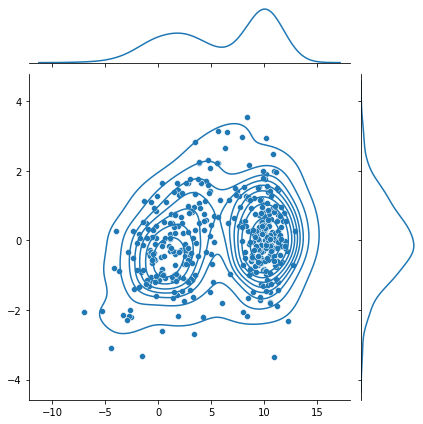

In [9]:
grid = sns.JointGrid(x=x, y=y)

g = grid.plot_joint(sns.scatterplot)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.kdeplot)

(b) The mean, mode and median for each marginal distribution 

The mean of the mixture density $p(x)$ is given by the weighted sum of the means of each random variable:

>$\mathbb{E}[x] = \alpha\mu_1 + (1 - \alpha)\mu_2$

In [10]:
(m[:, :] * w)[:, 0]

array([4. , 0.8])

Thus, we have:

$\mathbb{E}[x] = 4$

$\mathbb{E}[y] = 0.8$

The mode can be defined as the value of $x$ having the highest frequency of occurence. For a continous random variable, the mode is defined as a peak in the density $p(\boldsymbol{x})$. A particular density $p(\boldsymbol{x})$ may have more than one mode, and furthermore there may be a very large number of modes in high-dimensional distributions. Therefore, due to this computational challenge, finding the mode of a continous distribution can be computationally challenging.

One way though, is to compute the extreme condition:

>$\frac{\mathcal{d}p(\boldsymbol{x})}{\mathcal{d}x} = 0$ or $\frac{\mathcal{d}p(\boldsymbol{y})}{\mathcal{d}y} = 0$

And check if it is not an inflection point:

>$\frac{\mathcal{d}^2p(\boldsymbol{x})}{{\mathcal{d}x}^2} < 0$ or $\frac{\mathcal{d}p(\boldsymbol{y})}{{\mathcal{d}y}^2} < 0$

(c) The mean and mode for the two-dimensional distribution

The mean of a random variable $X$ with states $\boldsymbol{x}\in\mathbb{R}^D$is an average and is defined as:

$$\mathbb{E}=
\begin{bmatrix}
\mathbb{E}_{x_{1}}[x_{1}] \\
\vdots \\
\mathbb{E}_{x_{d}}[x_{d}] \\
\end{bmatrix}
$$

where 

$$\mathbb{E}_{x_{d}}[x_{d}]=
\int_{\mathcal{X}} x_{d}p(x_{d})\, dx_{d} \text{ for d = 1, 2, ..., D}
$$

Since we already have the expectation values, the mean for the two-dimensional distribution is:

$$\mu=
\begin{bmatrix}
4.0 \\
0.8 \\
\end{bmatrix}
$$

The mode of two dimensional distribution is obtained first by solving the extremum conditions:

$\frac{\partial(x,y)}{\partial x} = 0$ and $\frac{\partial(x,y)}{\partial y} = 0$

and then verifying for every solution that is indeed a peak, i.e.:

$\frac{\partial^{2}(x,y)}{\partial x^{2}} < 0$ and $\frac{\partial^{2}(x,y)}{\partial y^{2}} < 0$

$$\text{det}
\begin{pmatrix}
\begin{bmatrix}
\frac{\partial^{2}(x,y)}{\partial x^{2}} & \frac{\partial^{2}(x,y)}{\partial y\partial x} & \\
\frac{\partial^{2}(x,y)}{\partial x\partial y} & \frac{\partial^{2}(x,y)}{\partial y^{2}} & \\
\end{bmatrix}
\end{pmatrix} > 0
$$

Again, these equations can be solved only numerically.

#### Bernoulli Distribution w/ Beta conjugation

Considering a Bernoulli distribution with a parameter $\theta$:

>$p(x|\theta) = \theta^{x} (1-\theta)^{1 - x}, x\in$ {0,1}

Let $x\in$ {0,1} be distributed according to the Bernoulli distribution with parameter $\theta\in$ [0,1], that is, 

>$p(x = 1|\theta) = \theta$.

This can also be expressed as 

>$p(x|\theta) = \theta^{x} (1-\theta)^{1-x}$

Text(0.5, 0, 'x')

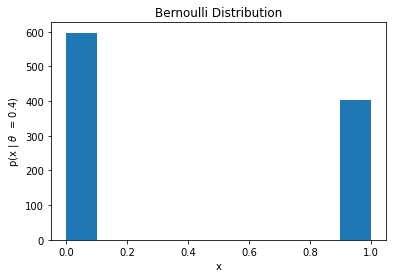

In [11]:
X = np.random.binomial(1, 0.4, 1000)

plt.hist(X)
plt.title('Bernoulli Distribution')
plt.ylabel(r'p(x | $\theta$  = 0.4)')
plt.xlabel('x')


Let $\theta$ be distributed according to a Beta distribution with parameters $\alpha, \beta$, that is,

>$p(\theta|\alpha, \beta) \propto \theta^{\alpha - 1} (1 - \theta)^{\beta -1}$

Text(0.5, 0, 'x')

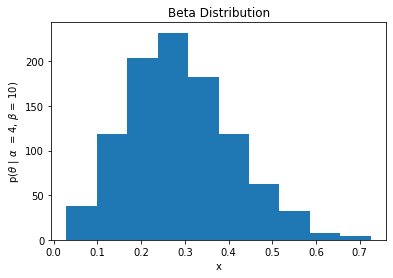

In [12]:
T = np.random.beta(4, 10, 1000)

plt.hist(T)
plt.title('Beta Distribution')
plt.ylabel(r'p($\theta$ | $\alpha$  = 4, $\beta$ = 10)')
plt.xlabel('x')

Now, multiplying the Beta and the Bernoulli distributions, we get:

>$$
\begin{equation}
\begin{split}
p(\theta|x, \alpha, \beta) & =  p(x|\theta) p(\theta|\alpha, \beta) \\
&\propto \theta^{x - 1} (1 - \theta)^{x - 1}\theta^{\alpha - 1} (1 - \theta)^{\beta -1} \\
& = \theta^{\alpha - x - 1} (1 - \theta)^{\beta - x} \\
& \propto p(\theta|\alpha + x + 1, \beta + (1 - x))
\end{split}
\end{equation}
$$

The last line is the Beta distribution with parameters $(\alpha + x + 1, \beta + (1 - x))$

Generallizing, the posterior distribution $p(\theta|x_{i}, \alpha, \beta)$ have the form of:

>$p(\theta |x_{1}, \dots, x_{N}) = \frac{1}{\mathcal{B}(\alpha+x_{i}, \beta + 1 - x_{i})} \theta^{\alpha - x - 1} (1 - \theta)^{\beta - x} $